<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_2_1_0_single_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.datasets as skds
X, Y = skds.make_blobs(n_samples=100, n_features=2,
                       centers=2, random_state=1)
print(X[:5,:], type(X))
print(Y[:5], type(Y))

[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]] <class 'numpy.ndarray'>
[0 1 0 0 1] <class 'numpy.ndarray'>


In [ ]:
import torch
X = torch.tensor(X)

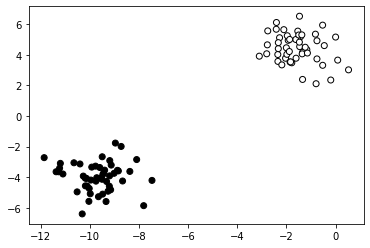

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");

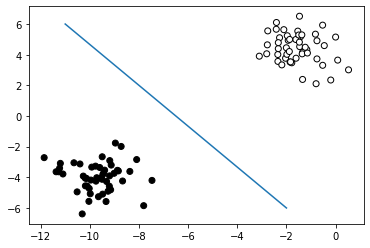

In [ ]:
plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");
plt.plot([-11, -2], [6, -6]);

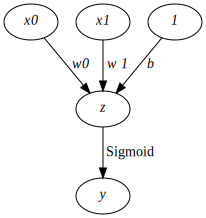

In [ ]:
from graphviz import Digraph
dot = Digraph('Neuron')
dot.node('x0', '<<I>x<sub>0</sub></I>>')
dot.node('x1', '<<I>x<sub>1</sub></I>>')
dot.node('bias', '<<I>1</I>>')
dot.node('z', '<<I>z</I>>')
dot.node('y', '<<I>y</I>>')

dot.edge('x0','z',label='<<I>w<sub>0</sub></I>>')
dot.edge('x1','z',label='<<I>  w<sub>1</sub></I>>')
dot.edge('bias','z',label='<<I>  b</I>>')
dot.edge('z','y',label=' Sigmoid')

dot.format='png'
dot.view()
dot

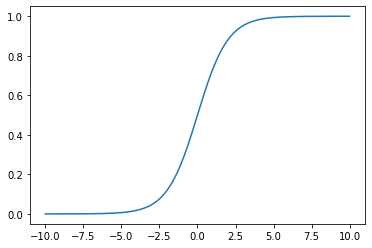

In [ ]:
import numpy as np
z = np.linspace(-10, 10, 1000)
y=1 / (1 + np.exp(-z))
plt.plot(z, y);

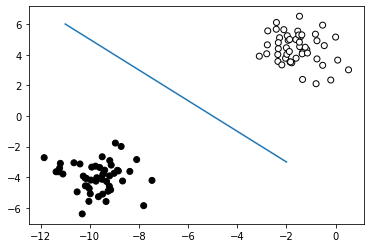

In [ ]:
plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");
w0, w1, b = -1, -1, -5
line = lambda x:-w0/w1 * x - b/w1
x0   = torch.tensor([-11, -2])
x1   = line(x0)
plt.plot(x0,x1);

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


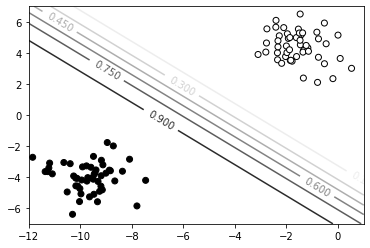

In [ ]:
w0, w1, b = -1, -1, -5
z = lambda x0,x1: w0*x0 + w1*x1 + b
y = lambda z: 1 / (1 + torch.exp(-z))

x0, x1 = torch.linspace(-12, 1, 100), torch.linspace(-7, 7, 100)
grid0,grid1 = torch.meshgrid(x0, x1);

fig = plt.contour(grid0, grid1, y(z(grid0,grid1)), cmap="Greys");
fig.clabel(inline=True, fontsize=10)

plt.scatter(X[:, 0], X[:, 1],
            c=Y, cmap="Greys", edgecolor="black");